In [1]:
%load_ext autoreload
%autoreload 

In [2]:
from Wind.Results import DBResults
from Wind.Private.DBConfig import mongoremote,mongolocal,mongolocaltest
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pprint
import json

In [3]:
def print_config(name):

   with open('e:/Wind/Scripts/MultipleData/configsjm/'+ name + '.json') as json_file:
      data = json.load(json_file)
      pprint.pprint(data)

   return

In [4]:
# read and print .json file

### MLP Best

In [5]:
query = {"experiment": "JM_MLP_s2s_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [6]:
print_config('config_MLP_s2s')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s'},
 'data': {'ahead': [1, 12],
          'datanames': ['54-27274-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'slice': 1,
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


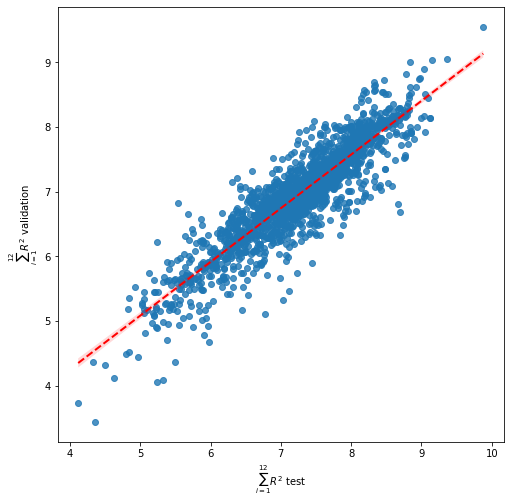

In [7]:
results.plot_densplot(plot='regression',glm=False, figsize=(8,8), save = 'MLP_best_densplot', saveformat='png' )

2000

MEAN (test)= 7.253844933539594
StDev (test)= 0.7921884840690845
MEAN (val)= 6.953885354741694
StDev (val)= 0.7320343946147412


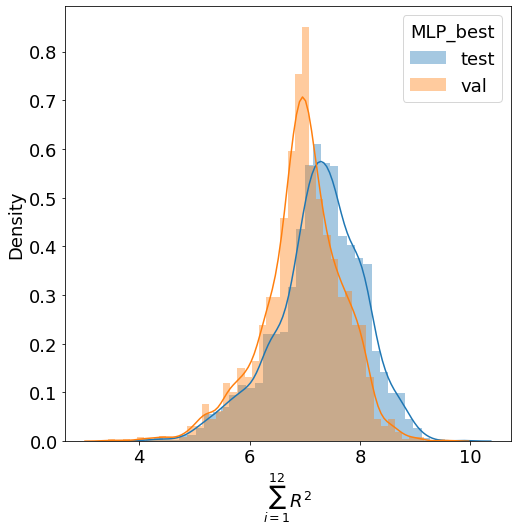

In [8]:
results.sample(1)
results.selected_size()
results.plot_distplot(seaborn=True, dset=('test', 'val'),figsize=(8,8), title='MLP_best', font=18, labels=['test','val'],saveformat='png', save='MLP_best_distplot')

### CNN Best - JM_CNN_s2s_best

In [9]:
query = {"experiment": "JM_CNN_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [10]:
print_config('config_CNN_s2s_best')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.1],
          'activation_full': ['leaky', 0.4],
          'dilation': False,
          'drop': 0.5,
          'filters': [512],
          'full': [1024, 512, 256],
          'fulldrop': 0.5,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [1],
          'mode': 'CNN_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_s2s_cas',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

MEAN (test)= 7.145776229902032
StDev (test)= 0.79521063273668
MEAN (val)= 6.8402404943777615
StDev (val)= 0.7506470829306136


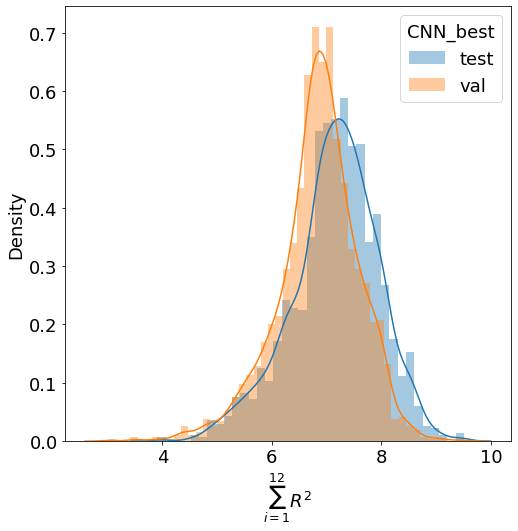

In [11]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='CNN_best', font=18, labels=['test','val'],save='JM_CNN_best_distplot',saveformat='png')

### MLP recursive

In [12]:
query = {"experiment": "JM_MLP_rec","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [13]:
print_config('config_MLP_s2s_rec')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s_rec'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5548-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'slice': 1,
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

MEAN (test)= 7.121664212430034
StDev (test)= 0.7882264917882157
MEAN (val)= 6.834147014279794
StDev (val)= 0.735383370222404


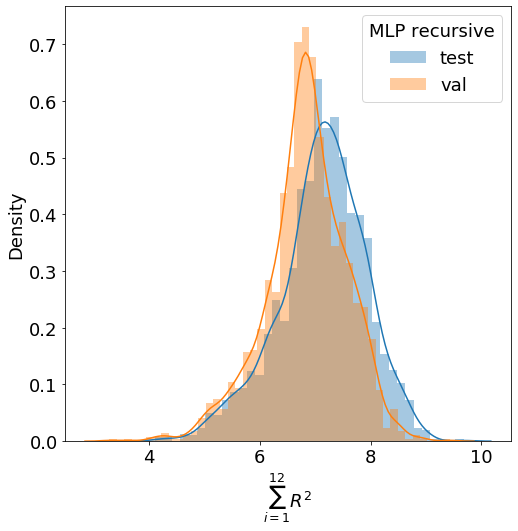

In [14]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='MLP recursive', font=18, labels=['test','val'],save='MLP_rec_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.11392
Method:                          IRLS   Log-Likelihood:                -664.61
Date:                Tue, 04 Feb 2020   Deviance:                       227.61
Time:                        19:28:32   Pearson chi2:                     228.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5012      0.071      7.105      0.000       0.363       0.639
validation     0.9687      0.010     94.392      0.0

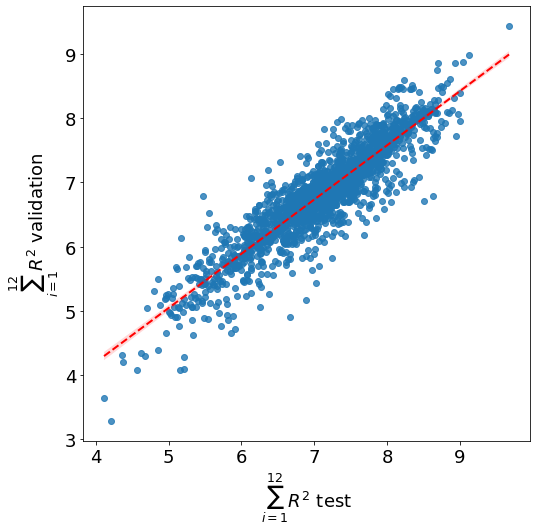

In [15]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8),save="MLP_rec_densplot", saveformat="png")

### MLP future (temperature in future) low resolution weather input in future - JM_MLP_s2s_fut

In [16]:
query = {"experiment": "JM_MLP_s2s_fut","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [17]:
print_config('config_MLP_s2s_future')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_s2s_fut'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'dmatrix': 'future',
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': [0, 1, 2, 3, 4, 5, 6],
          'varsf': [2]},
 'experiment': 'JM_MLP_s2s_fut',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

MEAN (test)= 7.806734885214624
StDev (test)= 0.7846854959994536
MEAN (val)= 7.5414783095266165
StDev (val)= 0.7491914881900474


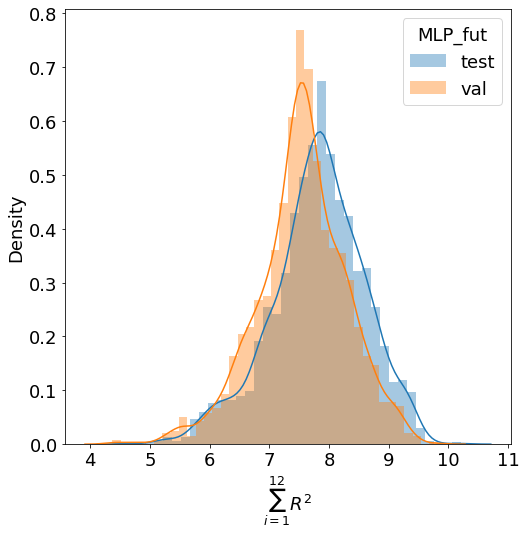

In [18]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='MLP_fut', font=18, labels=['test','val'],save='MLP_fut_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.11391
Method:                          IRLS   Log-Likelihood:                -664.50
Date:                Tue, 04 Feb 2020   Deviance:                       227.59
Time:                        19:28:37   Pearson chi2:                     228.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6751      0.076      8.843      0.000       0.525       0.825
validation     0.9457      0.010     93.878      0.0

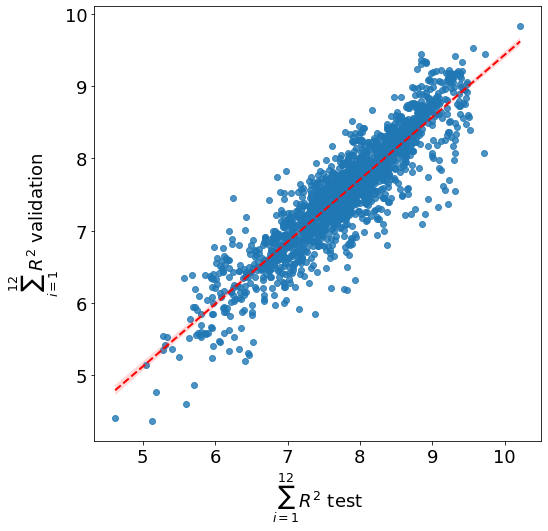

In [19]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8),save="MLP_fut_densplot", saveformat="png")

### MLP Cascade

In [20]:
query = {"experiment": "JM_MLP_cas_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [21]:
print_config('config_MLP_s2s_cas_best')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.3],
          'activation_full': ['leaky', 0.3],
          'batchnorm': True,
          'drop': 0.4,
          'full': [1024, 512, 512],
          'fulldrop': 0.5,
          'mode': 'MLP_s2s_cas'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5548-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


2000

MEAN (test)= 7.2504926159947605
StDev (test)= 0.8011011642044916
MEAN (val)= 6.928719753975598
StDev (val)= 0.7369461154955378


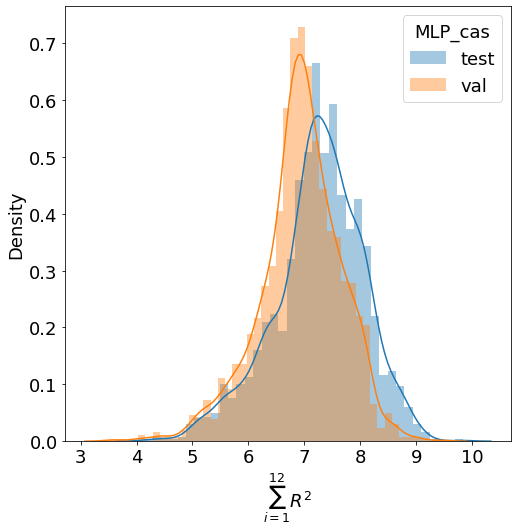

In [22]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='MLP_cas', font=18, labels=['test','val'],save='MLP_cas_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12902
Method:                          IRLS   Log-Likelihood:                -789.12
Date:                Tue, 04 Feb 2020   Deviance:                       257.79
Time:                        19:28:41   Pearson chi2:                     258.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5173      0.076      6.812      0.000       0.368       0.666
validation     0.9718      0.011     89.163      0.0

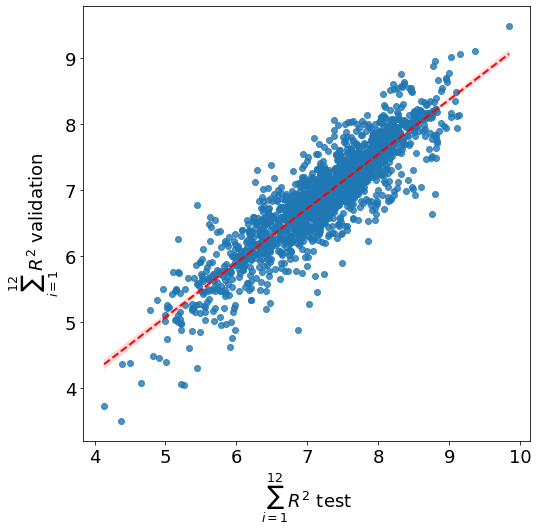

In [23]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_cas_densplot", saveformat="png")

### RNN best

In [24]:
query = {"experiment": "JM_RNN_best","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [25]:
print_config('config_RNN_s2s_JM')

{'_id': '00000000',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_BEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10

MEAN (test)= 7.146648816983471
StDev (test)= 0.7973877848925358
MEAN (val)= 6.823080669923635
StDev (val)= 0.7362937589589522


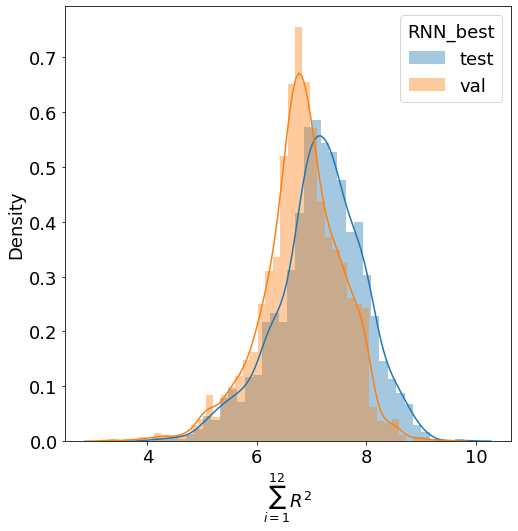

In [26]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN_best', font=18, labels=['test','val'],save='RNN_best_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12704
Method:                          IRLS   Log-Likelihood:                -773.64
Date:                Tue, 04 Feb 2020   Deviance:                       253.83
Time:                        19:28:45   Pearson chi2:                     254.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5359      0.074      7.214      0.000       0.390       0.681
validation     0.9689      0.011     89.508      0.0

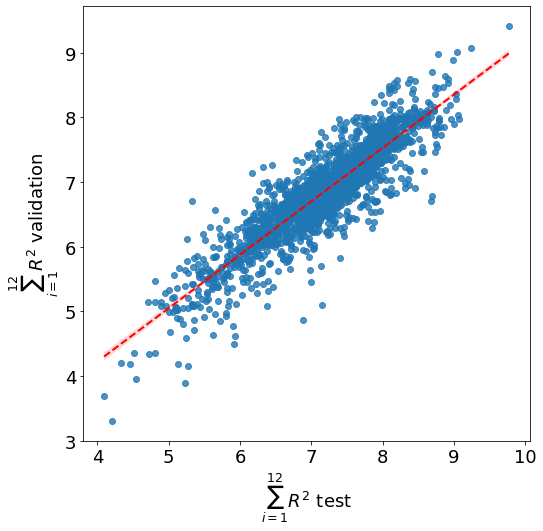

In [27]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="RNN_best_densplot", saveformat="png")

## RNN Attention

In [28]:
query = {"experiment": "JM_RNN_Att","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [29]:
print_config('config_RNN_Att_s2s')

{'_id': '00000001',
 'arch': {'CuDNN': True,
          'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'activation_r': 'hard_sigmoid',
          'attsize': 16,
          'bidirectional': True,
          'bimerge': 'ave',
          'drop': 0.1,
          'full': [512, 256, 128],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'mode': 'RNN_s2s_att',
          'neurons': 128,
          'nlayers': 1,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'rnn': 'GRU'},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'RNN_Att',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 

MEAN (test)= 7.1456860286679404
StDev (test)= 0.7974393463636342
MEAN (val)= 6.821444722454136
StDev (val)= 0.7372843065012561


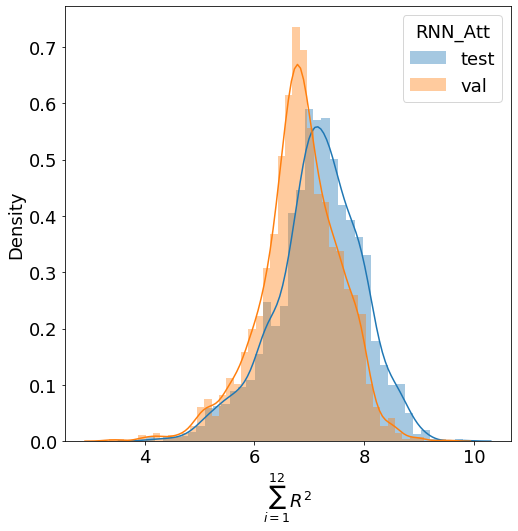

In [30]:
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RNN_Att', font=18, labels=['test','val'],save='RNN_Att_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12877
Method:                          IRLS   Log-Likelihood:                -787.19
Date:                Tue, 04 Feb 2020   Deviance:                       257.29
Time:                        19:28:49   Pearson chi2:                     257.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5561      0.075      7.447      0.000       0.410       0.702
validation     0.9660      0.011     88.760      0.0

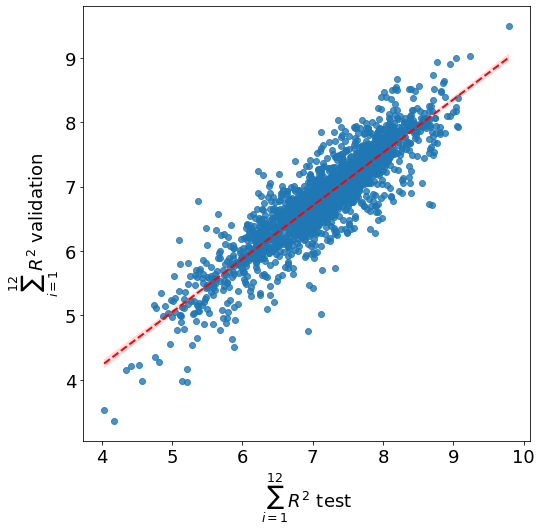

In [31]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="RNN_Att_densplot", saveformat="png")

### BASELINES

### Random Forest JM_RF_s2s_2

In [32]:
query = {"experiment": "JM_RF_s2s_2","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

126692

In [33]:
print_config('config_RF_s2s(JM)')

{'_id': '00000000',
 'arch': {'max_features': 'auto',
          'mode': 'RF_s2s',
          'n_estimators': 400,
          'oob_score': True},
 'data': {'ahead': [1, 12],
          'datanames': ['10-5328-12'],
          'dataset': 1,
          'datasize': 43834,
          'dmatrix': 'normal',
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'JM_RF_s2s',
 'training': {}}


126692

MEAN (test)= 6.770120707927506
StDev (test)= 0.8047620859978746
MEAN (val)= 6.532462243553212
StDev (val)= 0.7377275195651427


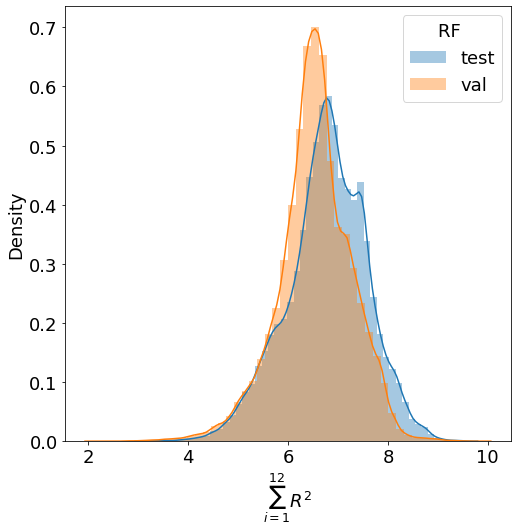

In [34]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='RF ', font=18, labels=['test','val'],save='RF_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:               126692
Model:                            GLM   Df Residuals:                   126690
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.14254
Method:                          IRLS   Log-Likelihood:                -56359.
Date:                Tue, 04 Feb 2020   Deviance:                       18058.
Time:                        19:29:27   Pearson chi2:                 1.81e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4769      0.009     50.455      0.000       0.458       0.495
validation     0.9634      0.001    670.046      0.0

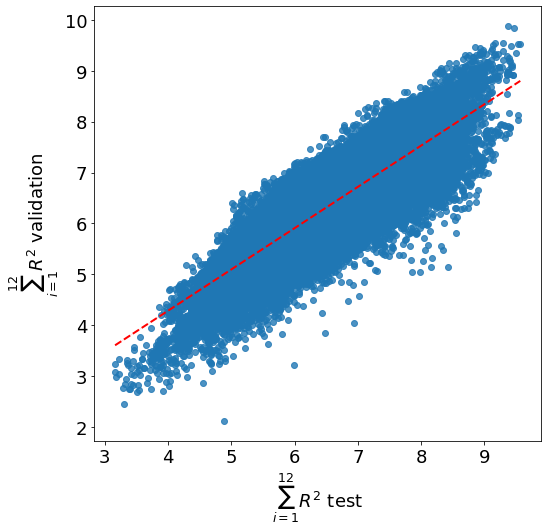

In [35]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="RF_densplot", saveformat="png")

### Persistence

In [36]:
query = {"experiment": "Persistence","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

126692

126692

MEAN (test)= 2.6989266365223457
StDev (test)= 1.9511900646278684
MEAN (val)= 2.4864331117051606
StDev (val)= 1.9197421745534917


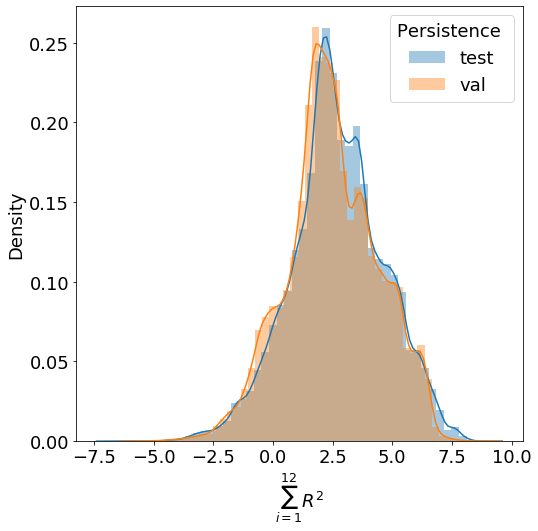

In [37]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='Persistence ', font=18, labels=['test','val'],save='Persistence_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:               126692
Model:                            GLM   Df Residuals:                   126690
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.40190
Method:                          IRLS   Log-Likelihood:            -1.2202e+05
Date:                Tue, 04 Feb 2020   Deviance:                       50917.
Time:                        19:30:02   Pearson chi2:                 5.09e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3089      0.003    105.980      0.000       0.303       0.315
validation     0.9612      0.001   1036.067      0.0

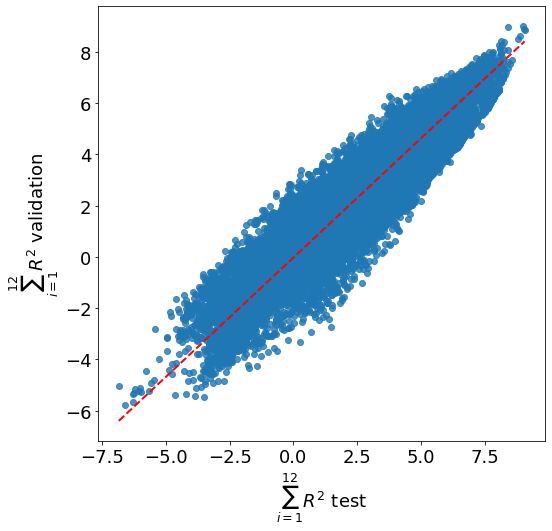

In [38]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="Persistence_densplot", saveformat="png")

### Persistence for 12 steps with series 5 m

In [54]:
query = {"experiment": "JM_Persistence_01_5m","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [55]:
print_config('config_KNN_s2s')

{'_id': '00000000',
 'arch': {'mode': 'KNN_s2s', 'n_neighbors': 101, 'weights': 'distance'},
 'data': {'ahead': 12,
          'datanames': ['10-5308-12'],
          'dataset': 0,
          'datasize': 43834,
          'dmatrix': 'normal',
          'fraction': 1,
          'lag': 4,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'iter': 1}}


In [56]:
print_config('config_persistence_5m')

{'_id': '00000000',
 'arch': {'mode': 'persistence'},
 'data': {'ahead': [1, 12],
          'datanames': ['54-27274-01'],
          'dataset': 0,
          'datasize': 526008,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {}}


2000

MEAN (test)= 10.946221664103911
StDev (test)= 0.343556166037185
MEAN (val)= 10.749256684087815
StDev (val)= 0.4359472965282758


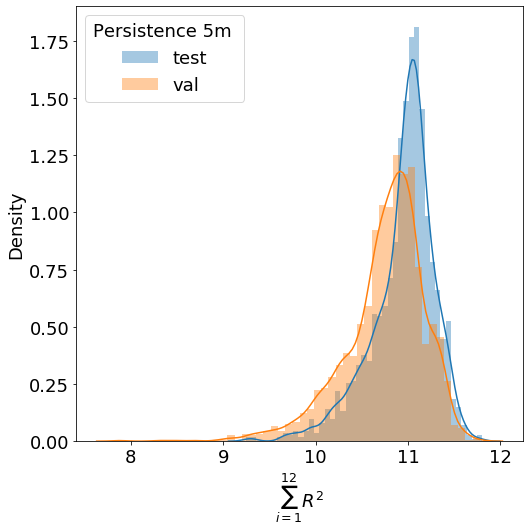

In [57]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='Persistence 5m ', font=18, labels=['test','val'],save='Persistence_5m_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.022471
Method:                          IRLS   Log-Likelihood:                 958.65
Date:                Tue, 04 Feb 2020   Deviance:                       44.897
Time:                        19:55:45   Pearson chi2:                     44.9
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3231      0.083     40.174      0.000       3.161       3.485
validation     0.7092      0.008     92.234      0.0

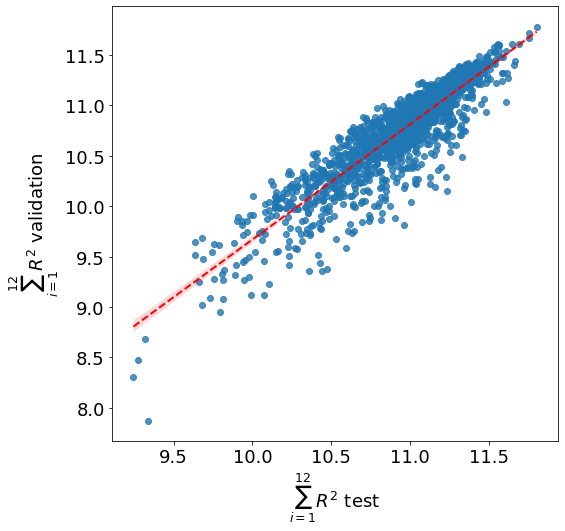

In [49]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="Persistence_5m_densplot", saveformat="png")

### KNN - knndir

In [39]:
query = {"experiment": "knndir","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

4200

In [40]:
print_config('config_KNN_s2s')

{'_id': '00000000',
 'arch': {'mode': 'KNN_s2s', 'n_neighbors': 101, 'weights': 'distance'},
 'data': {'ahead': 12,
          'datanames': ['10-5308-12'],
          'dataset': 0,
          'datasize': 43834,
          'dmatrix': 'normal',
          'fraction': 1,
          'lag': 4,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'iter': 1}}


4200

MEAN (test)= 4.674979422670386
StDev (test)= 1.0271759675344434
MEAN (val)= 4.430169599221997
StDev (val)= 0.9414654783014575


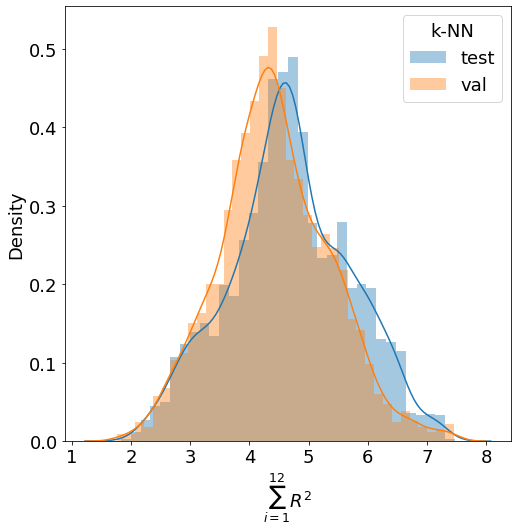

In [41]:
results.sample(1)
results.selected_size()
results.plot_distplot(dset=('test', 'val'),figsize=(8,8), title='k-NN', font=18, labels=['test','val'],save='knn_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 4200
Model:                            GLM   Df Residuals:                     4198
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.20088
Method:                          IRLS   Log-Likelihood:                -2587.9
Date:                Tue, 04 Feb 2020   Deviance:                       843.29
Time:                        19:30:08   Pearson chi2:                     843.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3256      0.033      9.788      0.000       0.260       0.391
validation     0.9818      0.007    133.648      0.0

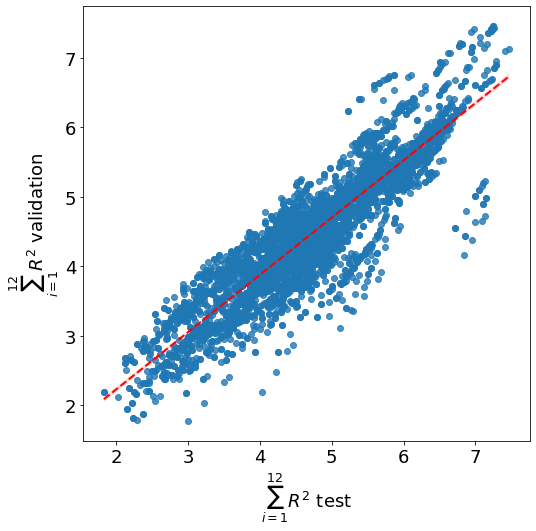

In [42]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="knn_densplot", saveformat="png")

### Direct vs seq 2 seq

### Direct regression

In [71]:
query = {"experiment": "JM_MLP_dir_rec","status":"done"}
# hay un error deberia ser JM_MLP_dir_reg (direct regression)
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [72]:
print_config('config_MLP_dir_reg')

{'_id': '00000000',
 'arch': {'activation': ['leaky', 0.2],
          'drop': 0.3,
          'full': [512, 256],
          'mode': 'MLP_dir_reg'},
 'data': {'ahead': [1, 12],
          'datanames': ['54-27274-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'fraction': 1,
          'lag': 12,
          'scaler': 'standard',
          'slice': 1,
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


MEAN (test)= 6.955068691725179
StDev (test)= 0.7872373789679346
MEAN (val)= 6.64994315441315
StDev (val)= 0.7223248577380191


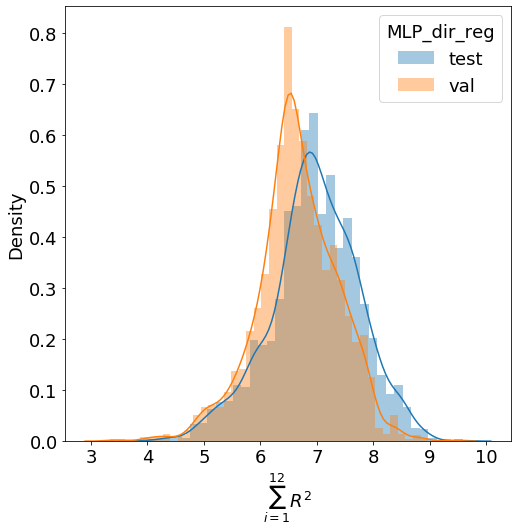

In [73]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), title='MLP_dir_reg', figsize=(8,8), save='MLP_Dir_reg_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12630
Method:                          IRLS   Log-Likelihood:                -767.81
Date:                Wed, 05 Feb 2020   Deviance:                       252.36
Time:                        08:55:12   Pearson chi2:                     252.
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4873      0.074      6.621      0.000       0.343       0.631
validation     0.9726      0.011     88.405      0.0

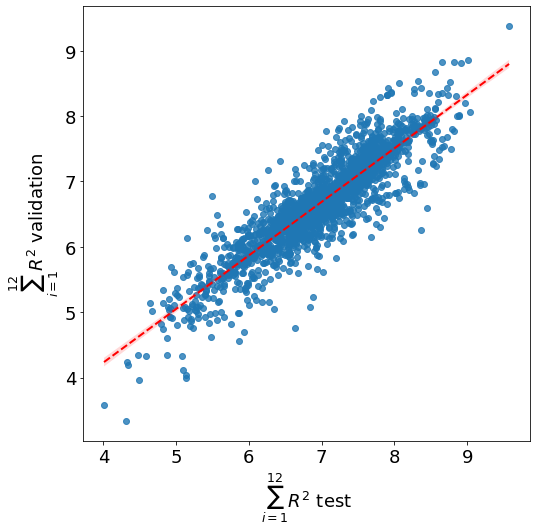

In [74]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_Dir_reg_densplot", saveformat="png")

### Series at 5m

### Prediction 12 time steps in the future with Series at 5min

In [62]:
query = {"experiment": "JM_MLP_5m","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

1929

MEAN (test)= 11.120824395780273
StDev (test)= 0.2686721700748572
MEAN (val)= 10.947986990009197
StDev (val)= 0.3500142056208988


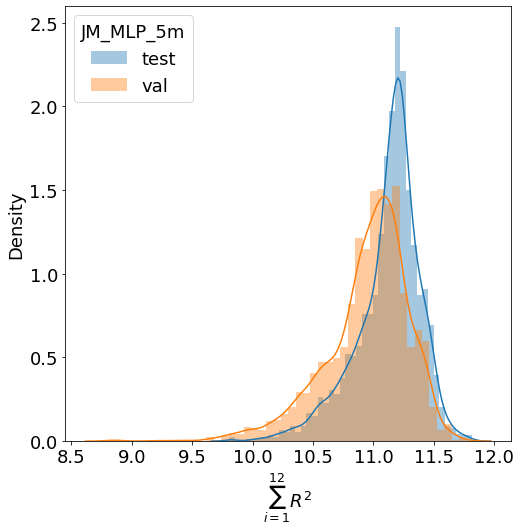

In [63]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(8,8), save='MLP_5m_1h_distplot',saveformat='png')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                 1929
Model:                            GLM   Df Residuals:                     1927
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.016042
Method:                          IRLS   Log-Likelihood:                 1249.7
Date:                Wed, 05 Feb 2020   Deviance:                       30.912
Time:                        08:20:30   Pearson chi2:                     30.9
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7084      0.090     41.092      0.000       3.532       3.885
validation     0.6771      0.008     82.178      0.0

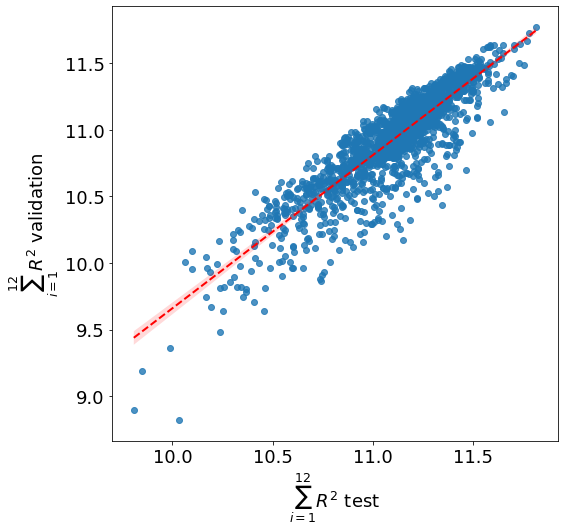

In [64]:
results.plot_densplot(plot='regression',glm=True, figsize=(8,8), save="MLP_5m_1h_densplot", saveformat="png")

### Prediction 144 steps and group them by 12 prediction 12 hours ahead